In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [21]:
df = sns.load_dataset('iris')

In [22]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [23]:
df.shape

(150, 5)

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64


<AxesSubplot:xlabel='species', ylabel='count'>

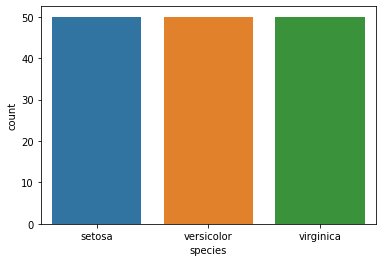

In [24]:
print(df['species'].value_counts())
sns.countplot(x = df['species'])


In [25]:
df.isna().mean()*100

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
species         0.0
dtype: float64

In [26]:
df.sample(5)

sepal_length  sepal_width  petal_length  petal_width     species
6             4.6          3.4           1.4          0.3      setosa
61            5.9          3.0           4.2          1.5  versicolor
81            5.5          2.4           3.7          1.0  versicolor
119           6.0          2.2           5.0          1.5   virginica
52            6.9          3.1           4.9          1.5  versicolor

In [27]:
encoder =LabelEncoder()

In [28]:
df['species'] = encoder.fit_transform(df['species'])

In [30]:
df.head()

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [39]:
X = df.drop(['sepal_width' , 'petal_width' , 'species'] , axis = True)
y = df.iloc[:,-1]

In [44]:
X

sepal_length  petal_length
0             5.1           1.4
1             4.9           1.4
2             4.7           1.3
3             4.6           1.5
4             5.0           1.4
..            ...           ...
145           6.7           5.2
146           6.3           5.0
147           6.5           5.2
148           6.2           5.4
149           5.9           5.1

[150 rows x 2 columns]

In [45]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [46]:
X_train,X_test , y_train ,y_test = train_test_split(X,y,test_size =0.2 , random_state=2)

In [47]:
clf = LogisticRegression(multi_class='multinomial')

In [49]:
clf.fit(X_train ,y_train)

LogisticRegression(multi_class='multinomial')

In [50]:
y_pred = clf.predict(X_test)

In [57]:
print("Accuracy_score: " , round(accuracy_score(y_test , y_pred)*100 ,2),"%")

Accuracy_score:  96.67 %


In [59]:
pd.DataFrame(confusion_matrix(y_test , y_pred))

0  1  2
0  14  0  0
1   0  7  1
2   0  0  8

In [62]:
# predictions
query = np.array([[3.4,2.7]])
clf.predict_proba(query)

C:\Users\Abhishek\miniconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [63]:
clf.predict(query)

C:\Users\Abhishek\miniconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])

C:\Users\Abhishek\miniconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Text(0.5, 1.0, 'Softmax Regression // Multinomial Regression')

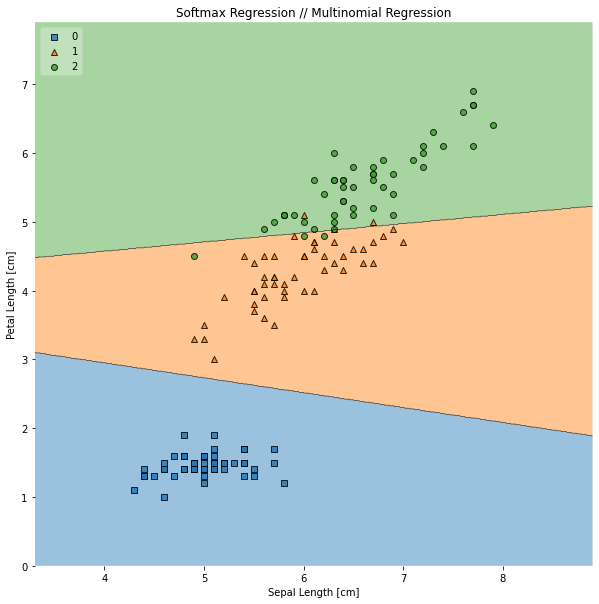

In [72]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,10))
plot_decision_regions(X.values ,y.values , clf , legend = 2)

plt.xlabel('Sepal Length [cm]')

plt.ylabel('Petal Length [cm]')
plt.title('Softmax Regression // Multinomial Regression')